# Method

### Import support packages

In [6]:
import os
import kagglehub
from DataGeneration import (
    get_season_mvp,
    collect_player_stats,
    load_combined_mvp_2001_2023,
    fetch_mvp_stats_by_year,
    check_missing_players,
    print_missing_players,
    get_player_season,
)

from DataProcessing import (
    get_iterable_window_data,
)

from DataExploration import (
    visualize_combined_sections,    
)

from DataModelling import (
    generate_initial_weights,
    cross_check_with_tree_importance,
    weighted_aggregation,
)

### make directories
player_data_path = 'Raw_player_data_sets'
window_player_path = 'windowed_data_sets'

os.makedirs(player_data_path, exist_ok=True)
os.makedirs(window_player_path, exist_ok=True)


### Fetch and save dataset

Yearly MVP results

In [7]:
mvp_data = load_combined_mvp_2001_2023()
players_by_year = mvp_data.groupby('year')['Player'].apply(list).to_dict()


fetch_mvp_stats_by_year(mvp_data, False, player_data_path)

tempdic = check_missing_players(players_by_year,player_data_path)

2001 :  ['Allen Iverson', 'Tim Duncan', "Shaquille O'Neal", 'Chris Webber', 'Kevin Garnett', 'Tracy McGrady', 'Karl Malone', 'Jason Kidd', 'Kobe Bryant', 'David Robinson', 'Ray Allen', 'Vince Carter', 'Paul Pierce', 'Jerry Stackhouse', 'Michael Finley', 'Anthony Mason', 'John Stockton']
Data for year 2001 already exists at Raw_player_data_sets/mvp_stats_2001.csv. Checking formatting...
Column names reformatted for year 2001 if necessary. Skipping fetching...
2002 :  ['Tim Duncan', 'Jason Kidd', "Shaquille O'Neal", 'Tracy McGrady', 'Kobe Bryant', 'Gary Payton', 'Chris Webber', 'Dirk Nowitzki', 'Allen Iverson', 'Ben Wallace', 'Paul Pierce', 'Kevin Garnett', 'Michael Jordan', 'Steve Nash', 'Jerry Stackhouse', 'Mike Bibby', 'Elton Brand', 'Peja Stojaković']
Data for year 2002 already exists at Raw_player_data_sets/mvp_stats_2002.csv. Checking formatting...
Column names reformatted for year 2002 if necessary. Skipping fetching...
2003 :  ['Tim Duncan', 'Kevin Garnett', 'Kobe Bryant', 'Tracy

### Missing player entries:

In [8]:
print_missing_players(tempdic)

Year 2001: 1 missing player(s)
Missing Players:
 - Shaquille O'Neal
----------------------------------------
Year 2002: 1 missing player(s)
Missing Players:
 - Shaquille O'Neal
----------------------------------------
Year 2003: 1 missing player(s)
Missing Players:
 - Shaquille O'Neal
----------------------------------------
Year 2004: 2 missing player(s)
Missing Players:
 - Jermaine O'Neal
 - Shaquille O'Neal
----------------------------------------
Year 2005: 2 missing player(s)
Missing Players:
 - Shaquille O'Neal
 - P.J. Brown
----------------------------------------
Year 2007: 1 missing player(s)
Missing Players:
 - Shaquille O'Neal
----------------------------------------


### generate windows and new data sets

In [9]:
get_iterable_window_data(players_by_year=players_by_year, data_path=player_data_path, mvp_data_path="MVP_data-sets/combined_MVP_data_set.csv")

<generator object get_iterable_window_data at 0x7fc2949baa70>

### run to get visualisations of a given window
### remember to enter a number!

Processing window with years: [2001, 2002, 2003]
Section Data Columns: Index(['DATE', 'PTS', 'AST', 'BLK', 'STL', 'TRB', 'Player', 'Position',
       'year'],
      dtype='object')
MVP Data Columns: Index(['Player', 'Rank', 'Pts Won', 'Pts Max', 'Share', 'year'], dtype='object')
Section Data Columns: Index(['DATE', 'PTS', 'AST', 'BLK', 'STL', 'TRB', 'Player', 'Position',
       'year'],
      dtype='object')
MVP Data Columns: Index(['Player', 'Rank', 'Pts Won', 'Pts Max', 'Share', 'year'], dtype='object')
Section Data Columns: Index(['DATE', 'PTS', 'AST', 'BLK', 'STL', 'TRB', 'Player', 'Position',
       'year'],
      dtype='object')
MVP Data Columns: Index(['Player', 'Rank', 'Pts Won', 'Pts Max', 'Share', 'year'], dtype='object')
Processing window with years: [2002, 2003, 2004]
Section Data Columns: Index(['DATE', 'PTS', 'AST', 'BLK', 'STL', 'TRB', 'Player', 'Position',
       'year'],
      dtype='object')
MVP Data Columns: Index(['Player', 'Rank', 'Pts Won', 'Pts Max', 'Share', 'ye

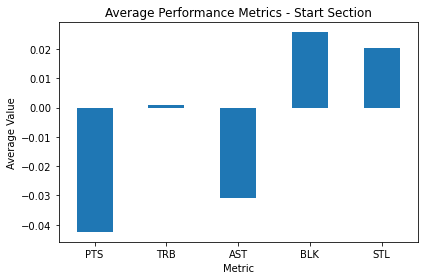

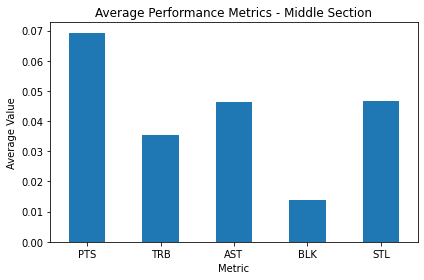

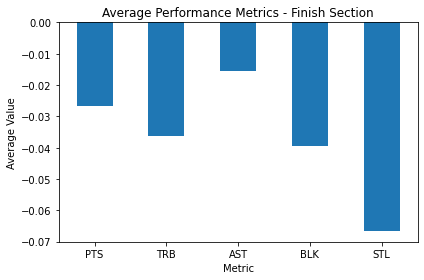

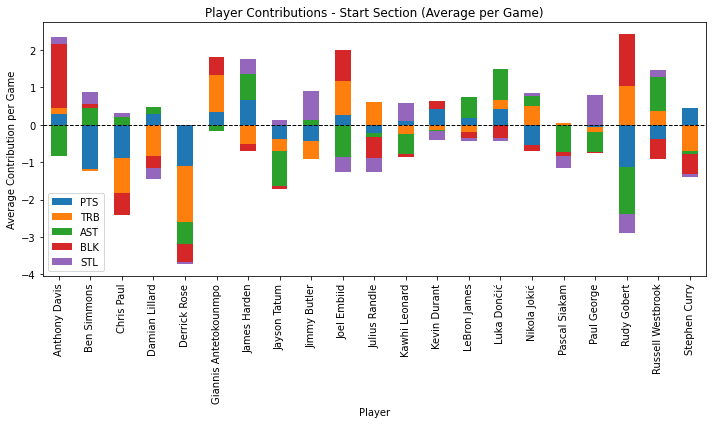

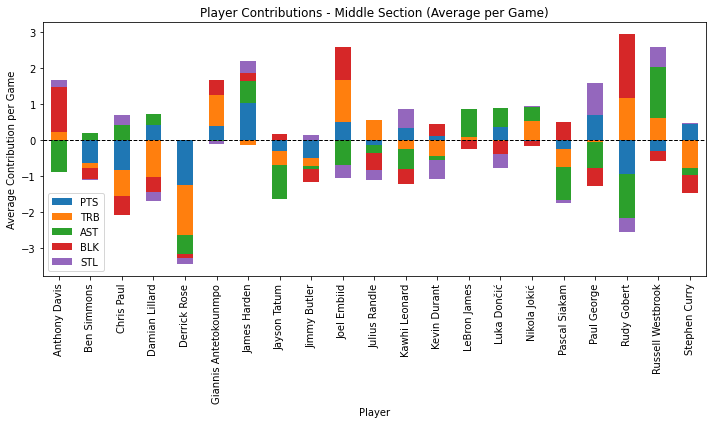

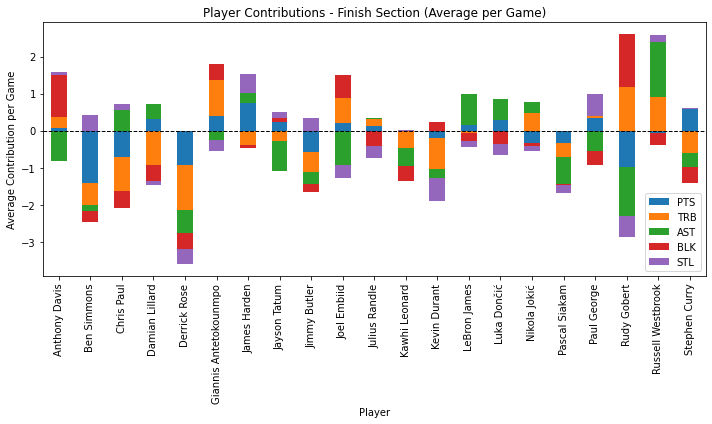

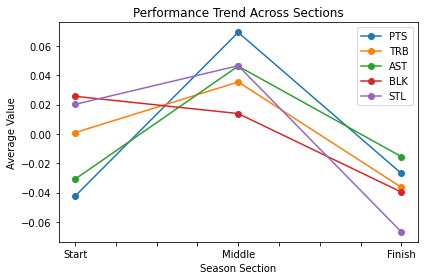

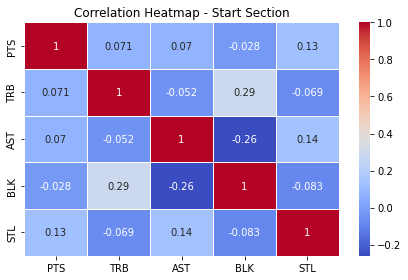

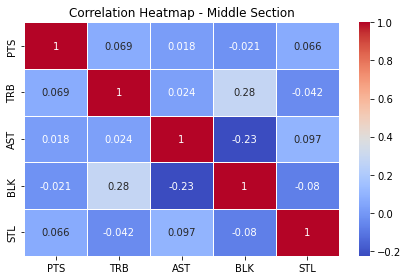

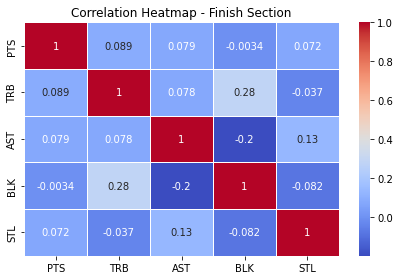

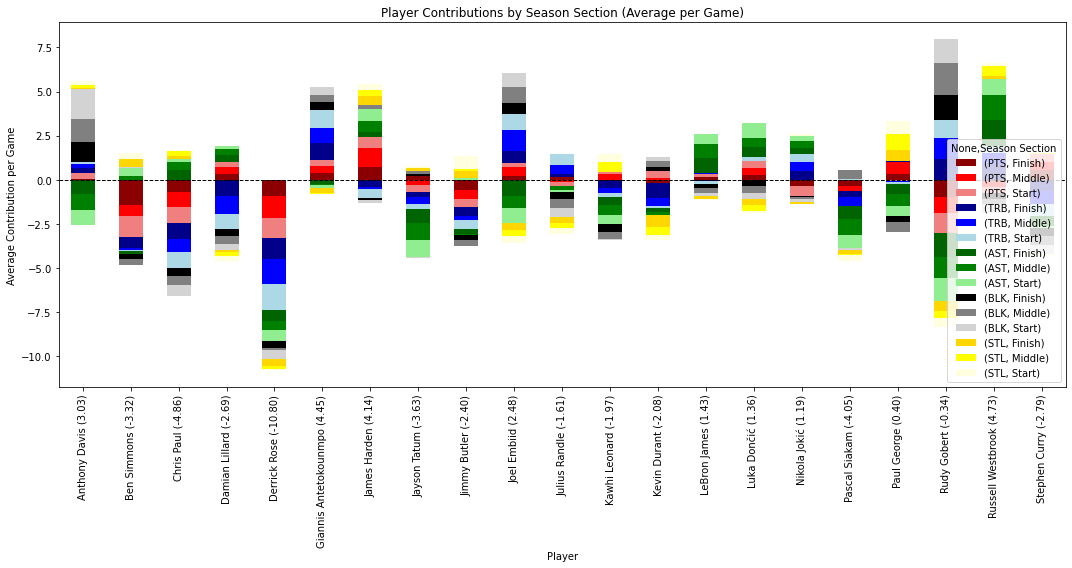

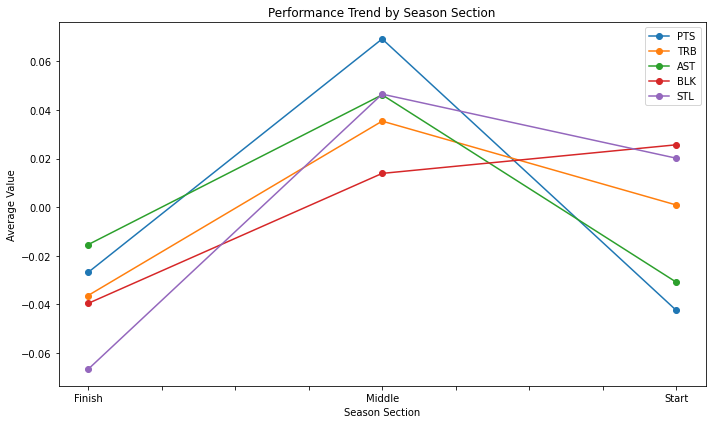

          DATE       PTS       AST       BLK       STL       TRB  \
0   2018-10-16  0.746985  0.728607 -0.714691 -0.238489 -0.082158   
1   2018-10-16 -0.189548 -1.177524  1.099854 -0.238489  0.385948   
2   2018-10-16  0.226689 -0.360611 -0.714691  2.244656 -1.486473   
3   2018-10-16  0.226689 -0.088306  0.192581 -0.238489 -0.082158   
4   2018-10-17 -0.605785 -1.722134  2.007126 -1.066204  1.556210   
..         ...       ...       ...       ...       ...       ...   
843 2021-02-05 -1.334200 -1.722134  2.914399 -1.066204  1.556210   
844 2021-02-05  0.851044 -0.632915  2.914399 -0.238489  0.854053   
845 2021-02-05 -0.813904  1.545521 -0.714691  0.589226 -0.316210   
846 2021-02-06  1.787578  1.273216 -0.714691 -0.238489 -0.316210   
847 2021-02-06  0.434807  0.728607 -0.714691  2.244656 -1.018368   

                    Player  Position  year  Share Season Section  
0            Stephen Curry         5  2019  0.173          Start  
1              Joel Embiid         7  2019  0.049

In [10]:
# Define player data path and players_by_year dictionary
player_data_path = 'Raw_player_data_sets'

# Get the iterator for window data, allow user to choose whether to split into sections or use full season
split_choice = input("Do you want to split the season into start, middle, and finish sections? (yes/no): ").strip().lower()
split_into_sections = True if split_choice == 'yes' else False

# Get the iterator for window data
window_data_iterator = get_iterable_window_data(players_by_year, player_data_path, split_into_sections=split_into_sections,mvp_data_path="MVP_data-sets/combined_MVP_data_set.csv")

# Convert the iterator to a list to allow indexing for selection
windows_data = list(window_data_iterator)

# List the available windows for selection
for i, window in enumerate(windows_data):
    print(f"Window {i}: Years - {window['window_years']}")

# Let the user choose a window
selected_window_index = int(input("Enter the window number you want to visualize: "))

# Get the selected window's data
selected_window_data = windows_data[selected_window_index]

# Generate the visualizations for the selected window based on the user's choice
if split_into_sections:
    # Extract the combined sections
    combined_start_section = selected_window_data['combined_start_section']
    combined_middle_section = selected_window_data['combined_middle_section']
    combined_finish_section = selected_window_data['combined_finish_section']

    # Generate the visualizations for the selected window with divided sections
    visualize_combined_sections(
        start_section=combined_start_section,
        middle_section=combined_middle_section,
        finish_section=combined_finish_section
    )



else:
    # Extract the combined season
    combined_season = selected_window_data['combined_season']
    # Generate the visualizations for the selected window with the full season
    visualize_combined_sections(combined_season=combined_season)


### Data modelling